In [1]:
import json
import pandas as pd

ValueError: min() arg is an empty sequence

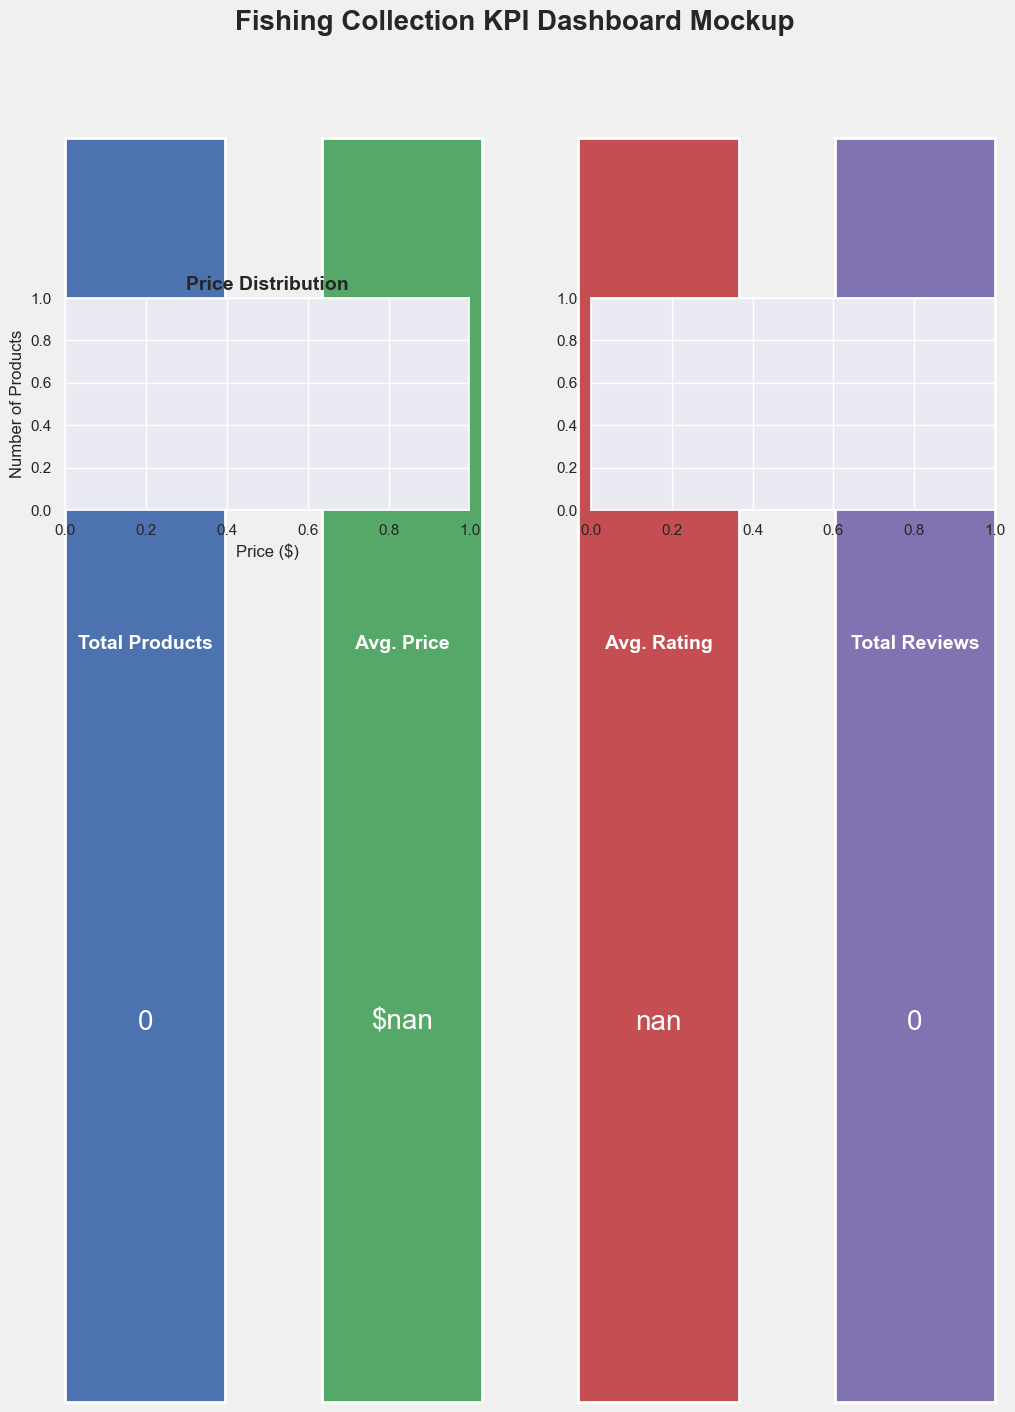

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset from the CSV file
df = pd.read_csv('Final.csv')

# Filter for the 'Fishing' sub-collection
# The .copy() is used to avoid SettingWithCopyWarning
fishing_df = df[df['sub_collection'] == 'Fishing'].copy()

# --- Data Transformation and Cleaning ---
# In the original file the price is already a number, so no need to remove '$'
# If your price column is a string like '$50.00', you would use:
# fishing_df['price'] = fishing_df['price'].replace({'\$': ''}, regex=True).astype(float)

# Use the correct column names: 'avg_rating' and 'review_count'
fishing_df['avg_rating'] = pd.to_numeric(fishing_df['avg_rating'], errors='coerce')
fishing_df['review_count'] = pd.to_numeric(fishing_df['review_count'], errors='coerce')

# Drop rows where avg_rating or review_count could not be converted to a number
fishing_df.dropna(subset=['avg_rating', 'review_count'], inplace=True)


# --- KPI Calculations ---
total_products = len(fishing_df)
average_price = fishing_df['price'].mean()
average_rating = fishing_df['avg_rating'].mean()
total_reviews = fishing_df['review_count'].sum()


# --- Dashboard Mockup Creation ---
fig = plt.figure(figsize=(12, 16), facecolor='#f0f0f0')
fig.suptitle('Fishing Collection KPI Dashboard Mockup', fontsize=20, weight='bold', y=0.98)

# --- KPI Cards ---
# Using GridSpec for a more organized layout
gs_kpi = fig.add_gridspec(1, 4, top=0.9, hspace=0.4, wspace=0.6)

def create_kpi_card(ax, title, value, color):
    ax.set_facecolor(color)
    ax.text(0.5, 0.6, title, ha='center', va='center', fontsize=14, weight='bold', color='white')
    ax.text(0.5, 0.3, value, ha='center', va='center', fontsize=20, color='white')
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
        spine.set_linewidth(2)

ax_kpi1 = fig.add_subplot(gs_kpi[0, 0])
create_kpi_card(ax_kpi1, 'Total Products', f'{total_products}', '#4c72b0')

ax_kpi2 = fig.add_subplot(gs_kpi[0, 1])
create_kpi_card(ax_kpi2, 'Avg. Price', f'${average_price:.2f}', '#55a868')

ax_kpi3 = fig.add_subplot(gs_kpi[0, 2])
create_kpi_card(ax_kpi3, 'Avg. Rating', f'{average_rating:.2f}', '#c44e52')

ax_kpi4 = fig.add_subplot(gs_kpi[0, 3])
create_kpi_card(ax_kpi4, 'Total Reviews', f'{int(total_reviews)}', '#8172b2')

# --- Main dashboard layout using GridSpec ---
gs_main = fig.add_gridspec(4, 2, top=0.8, hspace=0.4, wspace=0.3)

# --- Price Distribution ---
ax1 = fig.add_subplot(gs_main[0, 0])
sns.histplot(data=fishing_df, x='price', bins=20, kde=True, ax=ax1, color='#55a868')
ax1.set_title('Price Distribution', fontsize=14, weight='bold')
ax1.set_xlabel('Price ($)')
ax1.set_ylabel('Number of Products')

# --- Rating Distribution ---
ax2 = fig.add_subplot(gs_main[0, 1])
rating_counts = fishing_df['avg_rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values, ax=ax2, palette='viridis')
ax2.set_title('Rating Distribution', fontsize=14, weight='bold')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Number of Products')

# --- Top 5 Products by Reviews ---
ax3 = fig.add_subplot(gs_main[1, :])
top_5_by_reviews = fishing_df.nlargest(5, 'review_count')[['title', 'review_count']]
ax3.axis('off')
ax3.set_title('Top 5 Products by Number of Reviews', fontsize=14, weight='bold', loc='left')
table = ax3.table(cellText=top_5_by_reviews.values,
                  colLabels=top_5_by_reviews.columns,
                  cellLoc='center',
                  loc='center',
                  colWidths=[0.8, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# --- Top 5 Products by Rating ---
ax4 = fig.add_subplot(gs_main[2, :])
# Consider products with a minimum number of reviews to make the rating more reliable
top_5_by_rating = fishing_df[fishing_df['review_count'] >= 5].nlargest(5, 'avg_rating')[['title', 'avg_rating', 'review_count']]
ax4.axis('off')
ax4.set_title('Top 5 Products by Rating (with >= 5 reviews)', fontsize=14, weight='bold', loc='left')
table = ax4.table(cellText=top_5_by_rating.values,
                  colLabels=top_5_by_rating.columns,
                  cellLoc='center',
                  loc='center',
                  colWidths=[0.7, 0.15, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# --- This is the crucial part for saving the plot ---
# It saves the figure to a PNG file in the same directory.
# The bbox_inches='tight' and pad_inches=0.5 help to make the saved image look neat.
plt.savefig('kpi_dashboard_mockup.png', bbox_inches='tight', pad_inches=0.5, facecolor='#f0f0f0')

# --- OPTIONAL: Use this line to show the plot in an interactive window ---
# plt.show()

# --- Text Analysis: Word Cloud ---
text_for_wordcloud = ' '.join(fishing_df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Product Titles (Fishing Collection)', fontsize=20)

# --- Save the word cloud image ---
plt.savefig('fishing_title_wordcloud.png', bbox_inches='tight')

# --- OPTIONAL: Show the word cloud plot ---
# plt.show()

# Create a filtered CSV for your own use
#fishing_df.to_csv('fishing_products.csv', index=False)

print("Analysis complete. Check for 'kpi_dashboard_mockup.png', 'fishing_title_wordcloud.png', and 'fishing_products.csv' in your folder.")